# Gaussian Naive Bayes from Scratch — Iris Dataset

Цель ноутбука:
- загрузить датасет Iris
- провести базовый EDA
- обучить Gaussian Naive Bayes, реализованный с нуля
- оценить качество модели с помощью метрик


In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions

from src.naive_bayes import GaussianNaiveBayes
from src.metrics import accuracy_score

In [3]:
iris = load_iris()

df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)

df["target"] = iris.target
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [7]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

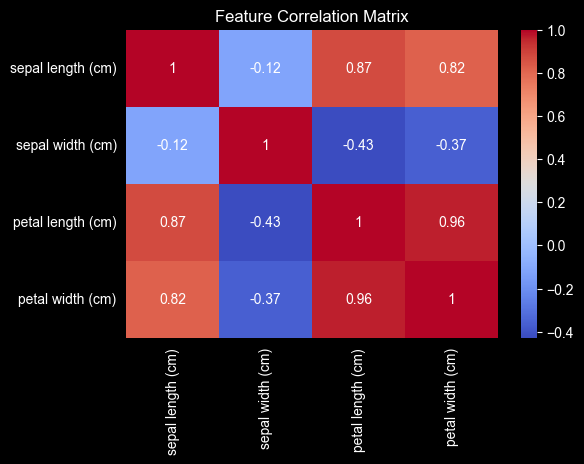

In [8]:
corr = df.drop(columns=["target", "species"]).corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

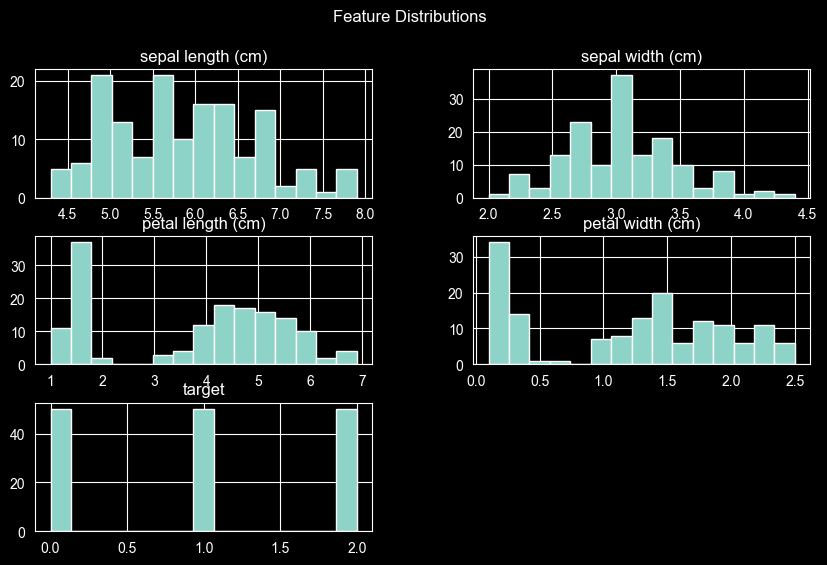

In [9]:
df.hist(figsize=(10, 6), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

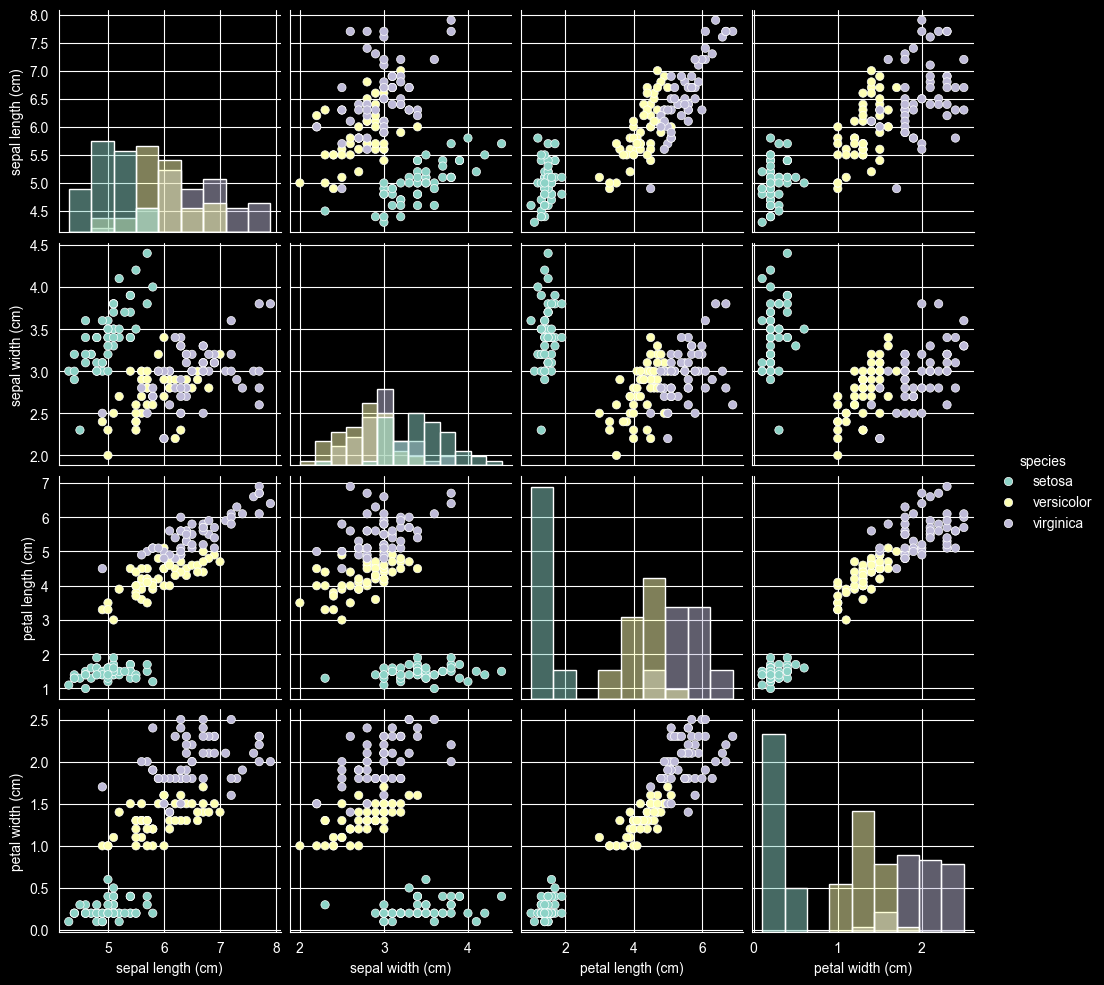

In [10]:
sns.pairplot(df, hue="species", vars=iris.feature_names, diag_kind="hist")
plt.show()

In [28]:
X = df[iris.feature_names].values
y = df["target"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [72]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [95]:
model = GaussianNaiveBayes()
model.fit(X_train_scaled, y_train);

In [74]:
y_pred = model.predict(X_val_scaled)

In [75]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Точность вашего GaussianNaiveBayes: {accuracy:.4f}')

Точность вашего GaussianNaiveBayes: 0.9667


In [76]:
sk_model = GaussianNB()
sk_model.fit(X_train, y_train)

sk_pred = sk_model.predict(X_val)

print("Scratch accuracy:", accuracy_score(y_val, y_pred))
print("Sklearn accuracy:", accuracy_score(y_val, sk_pred))


Scratch accuracy: 0.9666666666666667
Sklearn accuracy: 0.9666666666666667


In [93]:
def plot_decision_regions(X, y, clf, resolution=0.02):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFB3B3', '#B3FFB3', '#B3B3FF'])
    colors = ['#FF6B6B', '#51CF66', '#339AF0']

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    markers = [ 's', 'o', '^']
    labels = ['Setosa (0)', 'Versicolor (1)', 'Virginica (2)']

    for class_idx in range(3):
        mask = y == class_idx
        plt.scatter(X[mask, 0], X[mask, 1],
                   c=colors[class_idx],
                   marker=markers[class_idx],
                   edgecolor='black',
                   s=60,
                   alpha=0.8,
                   linewidth=0.5,
                   label=labels[class_idx])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, feature_names, title=None):
    feature1_name, feature2_name = feature_names[feature_indexes[0]], feature_names[feature_indexes[1]]
    X_feature_columns = X[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]

    clf.fit(X_train_feature_columns, y_train)

    plt.figure(figsize=(10, 8))
    plot_decision_regions(X=X_feature_columns, y=y, clf=clf)

    plt.xlabel(feature1_name, fontsize=12)
    plt.ylabel(feature2_name, fontsize=12)

    plt.legend(loc='upper left', title='Классы', fontsize=10, title_fontsize=11)

    plt.grid(True, linestyle='--', alpha=0.3)

    plt.title(title if title else f'Граница решений для {feature1_name} и {feature2_name}',
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

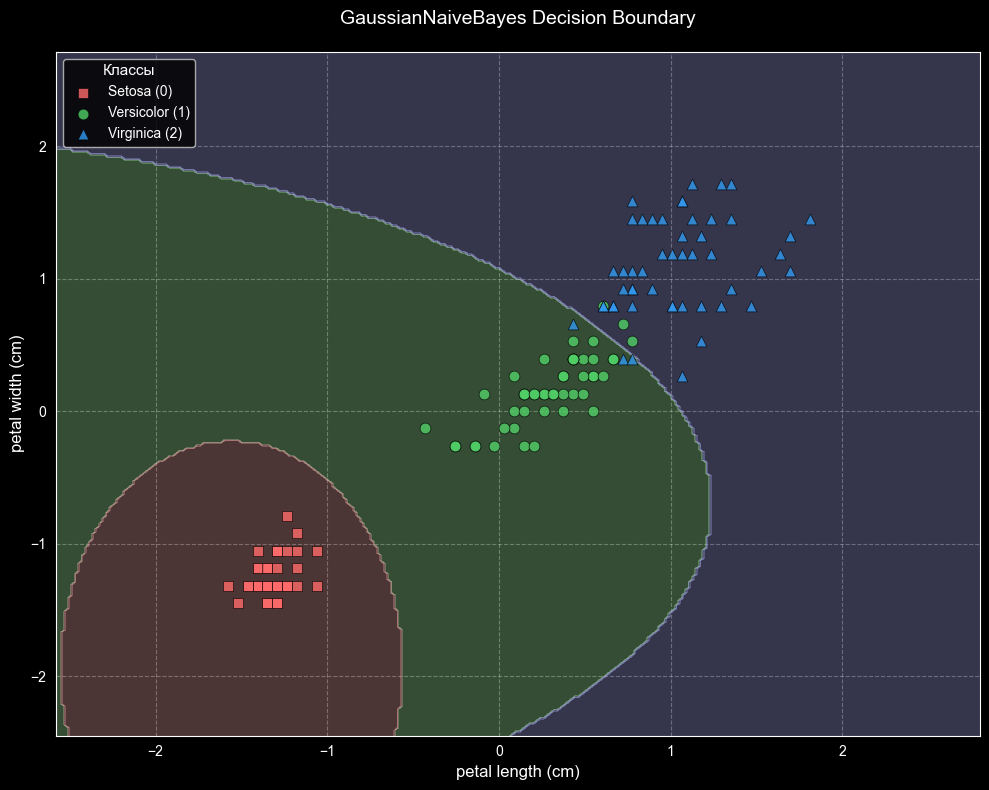

In [94]:
feature_indexes = [2, 3]
title = 'GaussianNaiveBayes Decision Boundary'

X_all_scaled = scaler.transform(X)

decision_boundary_plot(X_all_scaled, y, X_train_scaled, y_train, GaussianNaiveBayes(), feature_indexes, iris.feature_names, title)

## Выводы

- Проведён полноценный EDA с использованием pandas
- Реализован Gaussian Naive Bayes с нуля
- Использована численно стабильная логарифмическая форма
- Качество модели сопоставимо с реализацией sklearn
